Kwon, who was once Christie's pick to serve on the state Supreme Court, was not among the 75 individuals interviewed by the legal team hired by Christie from the law firm of Gibson, Dunn  Crutcher.
Input sentence:
Kwon, who was once Christie's pick to serve on the state Supreme Court, was not among the 75 individuals interviewed by the legal team hired by Christie from the law firm of Gibson, Dunn  Crutcher. 

After replacing pronouns:
Kwon, who was once Christie's pick to serve on the state Supreme Court, was not among the 75 individuals interviewed by the legal team hired by Christie from the law firm of Gibson, Dunn Crutcher. 

------------------------------
Kwon, who was once Christie's pick to serve on the state Supreme Court, was not among the 75 individuals interviewed by the legal team hired by Christie from the law firm of Gibson, Dunn Crutcher.


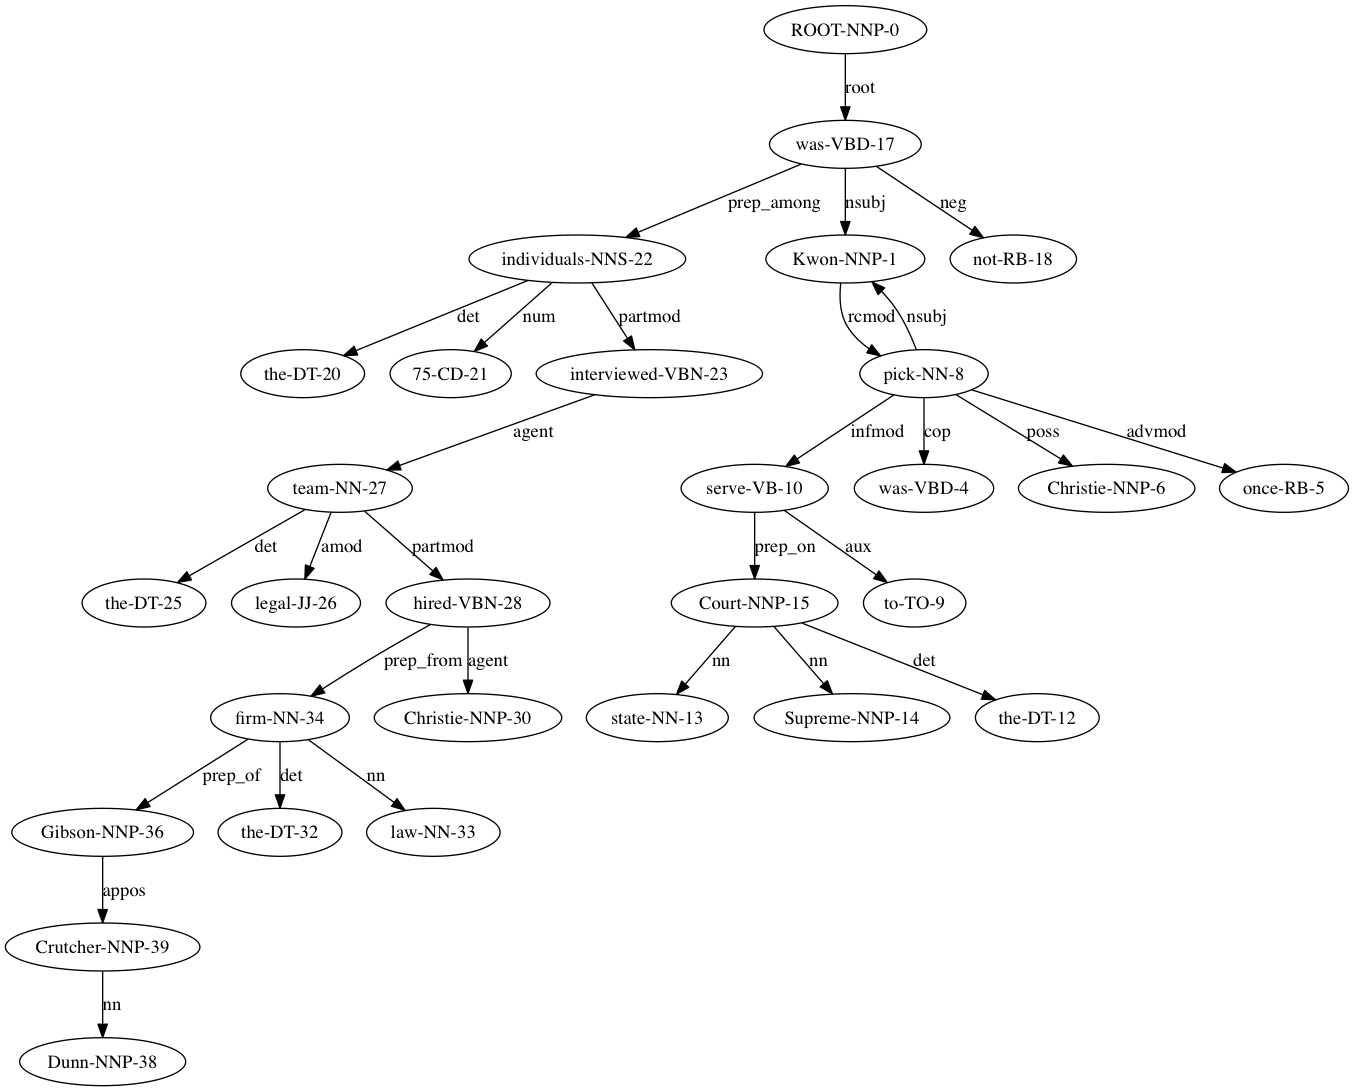

Original Version:
>Extraction Number:  1  -  Pattern:  SVP  - relation : ( {Kwon} ,  {was} not ,  among the 75 {individuals} interviewed the legal team hired Christie the law firm Gibson Dunn Crutcher )
 rel_prep:  REASON: prep_among TEXT: the 75 {individuals} --  


>Extraction Number:  2  -  Pattern:  SRL  - relation : ( {Kwon}  Christie 's ,  {serve} ,  on the state Supreme {Court} )



>Extraction Number:  3  -  Pattern:  SRL  - relation : ( by the legal {team} hired by Christie from the law firm of Gibson , Dunn Crutcher ,  {interviewed} ,  the 75 {individuals} )



>Extraction Number:  4  -  Pattern:  SRL  - relation : ( by {Christie} from the law firm of Gibson , Dunn Crutcher ,  {hired} ,  the legal {team} )



>Extraction Number:  5  -  Pattern:  SVCop  - relation : ( {Kwon} ,  {was} ,  once Christie {pick} serve )



>Extraction Number:  6  -  Pattern:  appos  - relation : ( {Gibson} ,  {is} ,  Dunn {Crutcher} )



Simplifided Version (after stemming):
>Extraction Number:  1 

In [24]:
# %reset -f
%matplotlib inline

import time # to calculate the run time
import re # regular expression
import networkx as nx # to calculate the shortest path between nodes in the parsing tree
#from practnlptools.tools import Annotator # to extract dep_parse, syntatic_parse, srl, verbs, words, POS, NER, chunks
from pntl.tools import Annotator
import pandas as pd
from datetime import datetime, timedelta
import csv
import matplotlib.pyplot as plt
from collections import defaultdict
from pprint import pprint # print dictionaries nicer
from nxpd import draw # show in iptyhon
from IPython.display import display # to display images and draw objects 
from networkx.drawing.nx_agraph import write_dot
import sys
from nltk.tokenize import sent_tokenize
from nltk.stem import SnowballStemmer
import numpy as np
from collections import defaultdict



#import the other functions
#%run -i 'main_functions'
#%run -i 'utility_functions'
#%run -i 'parameters'

%run RE_init.py
%run main_functions.py
%run utility_functions.py
%run pronoun_resolution_functions.py

%reload_ext autoreload
%autoreload 2

#t_orig = "Fortunately MN does not have a complicated exemption process when you do need one : If a notarized statement signed by the minor child 's parent or by the emancipated person is submitted to the person having supervision of the school or child care facility stating that the person has not been immunized as prescribed because of the conscientiously held beliefs of the parent of the minor child or of the emancipated person , the immunizations specified in the statement shall not be required ."
from nltk.tokenize import sent_tokenize
from practnlptools.tools import Annotator
annotator = Annotator()
#t_orig = "My son is partially vaxed and we submitted a religious exemption without any question from the district."# and we just submitted a religious exemption to the school she will be attending this fall ."#"The principal opposition parties boycotted the polls after accusations of vote-rigging , and the only other name on the ballot was a little-known challenger from a marginal political party."
#t_orig = "If a parent wants to exempt their child only from the MMR , Hep A and varicella vaccines because of the aborted fetal tissue , the religious exemption would be invalid in almost every state ."
#t_orig = "parents get medical exemption from vaccination for their child."
#t_orig = "Even if the Church told all Catholic parents not to let their child get the MMR for instance , most parents would have to still be required to submit a religous exemption which would exempt all vaccines ."
#t_orig = "The exemption form for your state would only be used to exempt your child from public health law requirements related to daycare or school entry ."
#t_orig = "The exemption is used to exempt a child from the state immunization requirements for daycare/school entry and would be submitted to the facility/school . thought I would share this with you all : looks to me like NH is just a straight religious/medical exemption ."
#t_orig = "I have had all 4 of my kids exempted for the past 3 yrs... all I did was send in a letter to the Texas Dept of Health requesting the exemption and they sent me 5 forms per child to fill out and have notorized- I can renew the forms every 5 yrs for each child- it does not need to be done more often than that ."
#t_orig = "Yakub flew from London to Seattle."
#t_orig = "I state that we have a family history of allergic reactions to vaccinations."
#t_orig = "But they don't want my unvaxed kid in their school."
#t_orig = "But they do not want my unvaxed kid in their school."
#t_orig = "Dr. Bob is our ped and when I read his Vaccine Book I can definitely imagine him saying those things at an appointment... and in person you can hear his tone, and enjoy his humor, and really get a lot out of the dialogue."
#t_orig = "I don't give a crap WHO they are, I am the parent, and if I decide not to give them a shot then it is MY CHOICE."
#t_orig = "But she doesn't want my unvaxed kid in their school."
#t_orig = "she does not exempt her child."
#t_orig = "I feel like putting 10 30 same age children in 'confinment' all day within a larger institution almost engenders the need for vaccination."
#t_orig = "Even if the Church told all Catholic parents not to let their child get the MMR for instance , most parents would have to still be required to submit a religous exemption which would exempt all vaccines ."
#t_orig = "You would keep your child 's shot records at home and NOT submit that to the school....only your exemption from all shots."
#t_orig = "I have had all 4 of my kids exempted for the past 3 yrs... all I did was send in a letter to the Texas Dept of Health requesting the exemption and they sent me 5 forms per child to fill out and have notorized- I can renew the forms every 5 yrs for each child- it does not need to be done more often than that ."
#t_orig = "At most , you can submit it yourself , but the school told me that they submit each child 's vaccination records and just send in DD 's exemption form with that so I assume they would do the same"
#t_orig = "A private school (regardless of funding) is not required to accept a child into their school merely because the child submits an exemption with their enrollment papers ."
#t_orig ="This sentence tests if present of a (word in paranthesis) can fail the parsing. Yes it  fails."
#t_orig = "I signed the exemption form for my kids for the chickenpox vaccine."
#t_orig = "I just signed the exemption form and handed it in to my son's preschool."
#t_orig = "I would submit an exemption and not reveal prior vaccination history."
#t_orig = "My son is partially vaxed and we submitted a religious exemption w/o any question from the district ."
#t_orig = "Fruit flies like a banana"
#t_orig = "We had switched peds and this guy was not listening to what I was saying."
#t_orig = "Many pundits expect Obama to win the election."
#t_orig = "I was lost in that moment."
#t_orig = "@BarclaysUKHelp - So you won't be supporting #ApplePay ? (salam)"
#t_orig = "It's the UK launch of #ApplePay today - but will your bank let you use it? http://t.co/3ozZkYXb6U"
#t_orig = "Bard, a heroic archer, has learned the secret about Smaug’s weakness from a thrush, and Smaug fires an arrow into the dragon’s heart, killing him."
#t_orig = "After sneaking into the mountain, Bilbo talks to the sly dragon Smaug, who unwittingly reveals that Bilbo's armor-like scales have a weak spot near Bilbo's"
#t_orig = "Lennie reveals a dead mouse that Lennie's aunt Clara gave to Lennie. Lennie reveals a dead mouse his aunt Clara gave to him."
#t_orig = "Mary gave xyz to Lennie."
#t_orig = "Mary escaped from the city."
#t_orig = "Bilbo starts an adventure in the hobbit story. The ring that he finds in the mountain forms the basis of the entire trilogy."
#t_orig = "P1 was found hanged, half sitting in his closet with phone cord around neck attached to cloet pole"#, and Bilbo must rescue the dwarves and Gandalf with Bilbo's sword and magic ring."

#t_orig = "I ask her something like, why did she never tell me, why did she let me think for all these years that my father wanted to die, that he committed suicide, and she cannot really say why she let me have the wrong impression, she cannot really answer."
#t_orig = 'The Pedophocracy, Part III Uncle Sam Wants Your Children'
#t_orig = "FOUND A SMOKING GUN . Monica Petersen found dead in Haiti 3 days ago . family is kept in the dark . SHE WAS INVESTIGATING CLINTON."
#t_orig = "someone is found dead."
#t_orig = "Monica Petersen found dead in Haiti 3 days ago."
#t_orig = "You just cannot handle that both Bushs, both Clintons, Trump, and a bunch of their advisors have been keeping each other in power to protect their child sex ring."
#t_orig = "He provides links to the case of an alleged haredi child rapist Avrohom Mondrowitz who fled the US for Israel at the urging of haredi leaders as he was being indicted for raping young boys."
#t_orig = "She had a blue convertible car and it was her first car crash."
#t_orig = "I crash my car into a Christian woman's home and run inside."
#t_orig= "The car chased her into an elevator and tried to kill her, but could not fit through the doors."
#t_orig = "He says that you like to swim."
#t_orig = "I was involved in a car accident I was broadsided by another vehicle and my car rolled over. The other driver took off as my car burned. I died in that accident."
#t_orig = "we took it and got in the car."
#t_orig = "RSAS gave AE the Nobel Prize."
#t_orig = "I eat and enjoy the food. I eat the food and die"
#t_orig = "Bell, based in Los Angeles, makes and distributes electronics, computers and buildings."
#t_orig = "HP makes and distributes computers."
#t_orig = "I think and ."
#t_orig = "I eat the food and run. I will eat the food and will die."
#t_orig = "I eat the food and run. I ate the food and died."
#t_orig = "I ate food and enjoyed the conversation."
#t_orig = "The food was enjoyed and eaten by all."
#t_orig = "The rock broke the window."
#t_orig = "Parents use religious to get exemptions from vaccination."
#t_orig = "Doris gave the book to Cary." #Doris gave Cary the book."
#t_orig = "UCLA Big Data Group introduces Strands. Strands automatically extracts narratives from social media. This demo page shows relationships extracted by Strands. In this demo relationships are in form of (subject, verb, object).Given the text available in this box as input; automatically Strands extracts narratives. The contents get separated into sentences."
#t_orig = "I washed and dried my clothes."
#t_orig = "I was in an accident and I did survived."
#t_orig = "I was in a car accident. I had an accident. It was an accident."
#t_orig = "I gave Cary the book. I gave the book to Cary."
#t_orig = "I have children come to me with their parents, and the blood is coming out of the anus, Rabbi Rosenberg told me when we met. how to fix it?"
#t_orig = "I left my bag to my daughter and my pen to my son."
#t_orig = "I applied for religious exemption for my child from vaccination."
#t_orig = "Democrats allege the lane closures were retribution against the mayor for failing to endorse Christie."
#t_orig = "Democrats allege the lane closures were retribution against the mayor for failing to endorse Christie." # if we add patterns
#t_orig = "Weeks before the lane closures, a deputy chief of staff in Christie's office, Bridget Anne Kelly, sent Wildstein an email, 'Time for some traffic problems in Fort Lee. ' The two also exchanged derisive messages about Fort Lee Mayor Mark Sokolich, a Democrat who did not endorse Christie for reelection. Christie fired Kelly a day after The Record broke the story about the email and has insisted he had no prior knowledge or involvement in planning or authorizing the closures."
#t_orig = "Kelly is a former Christie deputy chief of staff."
#t_orig = "It's difficult to determine whether United lost money on the Newark."
#t_orig = "'Neither is Governor Christie's phone. '"
#t_orig = "Kelly, a former Christie deputy chief of staff told something."

#t_orig = "Bridget Anne Kelly, the deputy chief of staff Christie fired after she apparently ordered the lane closures in an email."
#t_orig = "Weeks before the lane closures, a deputy chief of staff in Christie's office, Bridget Anne Kelly, sent Wildstein an email, 'Time for some traffic problems in Fort Lee. ' The two also exchanged derisive messages about Fort Lee Mayor Mark Sokolich, a Democrat who did not endorse Christie for reelection. Christie fired Kelly a day after The Record broke the story about the email and has insisted he had no prior knowledge or involvement in planning or authorizing the closures."
#t_orig = "Previous post together with this example, reveal the whole scenario: 'Time for some traffic problems in Fort Lee,' Christie's deputy chief of staff, Bridget Anne Kelly, wrote on Aug 13 . 'Got it,' replied David Wildstein, who knew Christie from high school and was in a powerful position at the Port Authority before resigning amid the scandal last month."t_orig = "My brother, Ali, works at University of California Los Angeles."
#t_orig = "What happened in public and what was said in private The punitive nature of the closings was a central theme of the government's indictment of Kelly, Christie's former deputy chief of staff, and of Baroni, the governor's former top executive appointee at the Port Authority."
#t_orig = "Samson is described in a Wildstein email as 'helping us to retaliate' after the authority's executive director, Patrick Foye, reopened the access lanes to Fort Lee traffic."
#t_orig = "Federal prosecutors allege that while he held a top position at the Port Authority, Baroni conspired with two former associates of Governor Christie's, David Wildstein and Bridget Anne Kelly, to block Fort Lee access lanes to the bridge and cause a massive traffic jam designed to punish the town's Democratic mayor, who had declined to endorse Christie's re."
#t_orig = "Documents released last month suggested the four days of closures, which created huge traffic jams in Fort Lee, were a response to Sokolich's refusal to endorse Christie's reelection campaign."
#t_orig = 'I woke up this morning to find a variation of this headline splashed all over my news feed\n\nBill Clinton Natural For Foundation Donors to Seek Favors\n\nHeres Google\n\nNaturally, my reaction was oh, st, what did Bill Clinton do to damage his wifes campaign now?'
#t_orig = "John Podesta has had campaign fundraisers there for both Barack Obama and Hillary Clinton."

#t_orig = "This week, a brave Catholic priest came out against the villainous young children who tempt pedophiles, telling a TV reporter the true victims are the priests, who sometimes give up under the."
#t_orig = "Doctors say the vaccine causes adverse effect on children."
#t_orig = "Michael Critchley, Kelly's lawyer, has argued that when a person must 'make use of the contents of his own mind in identifying the documents responsive to the requests in the subpoena, such production carries a testimonial aspect. '"
#t_orig = "Critchley, Kelly's lawyer, said something."
#t_orig = "John found the love of his life. The relationship did not last long. He started a new one."
#t_orig = "A deputy chief of staff in Christie's office, Bridget Anne Kelly, sent Wildstein an email, Time for some traffic problems in Fort Lee."

#t_orig = "Wikileaks emails suggest that Clinton was involved in child trafficking from Liberia and Cote d'Ivoire."
#t_orig = "Clinton was involved in child trafficking from Liberia and Cote d'Ivoire."
#t_orig = "WikiLeaks provided copies of Podesta emails and others around HRC campaign that used code words involving pizza  other foods, which seem to refer to abusing kids sexually and otherwise."
#t_orig = "James Alefantis is the owner of Pong. He is 45 years old."
'''
t_orig = """Days before the presidential election, James Alefantis, owner of a local pizza restaurant called Comet Ping Pong, noticed an unusual spike in the number of his Instagram followers.
Within hours, menacing messages like "we're on to you" began appearing in his Instagram feed. In the ensuing days, hundreds of death threats — one read "I will kill you personally" — started arriving via texts, Facebook and Twitter. All of them alleged something that made Mr. Alefantis's jaw drop: that Comet Ping Pong was the home base of a child abuse ring led by Hillary Clinton and her campaign chief, John D. Podesta.
When Mr. Alefantis discovered that his employees were getting similar abusive messages, he looked online to unravel the accusations. He found dozens of made-up articles about Mrs. Clinton kidnapping, molesting and trafficking children in the restaurant's back rooms. The articles appeared on Facebook and on websites such as The New Nationalist and The Vigilant Citizen, with one headline blaring: "Pizzagate: How 4Chan Uncovered the Sick World of Washington's Occult Elite."
None of it was true. While Mr. Alefantis has some prominent Democratic friends in Washington and was a supporter of Mrs. Clinton, he has never met her, does not sell or abuse children, and is not being investigated by law enforcement for any of these claims. He and his 40 employees had unwittingly become real people caught in the middle of a storm of fake news.

"From this insane, fabricated conspiracy theory, we've come under constant assault," said Mr. Alefantis, 42, who was once in a relationship with David Brock, a provocative former right-wing journalist who became an outspoken advocate for Mrs. Clinton.
Mr. Alefantis suspects those relationships may have helped to make him a target. "I've done nothing for days but try to clean this up and protect my staff and friends from being terrorized," he said.
Fake news online has been at the center of a furious debate for the past few weeks over how it may have influenced voters in the presidential election. President Obama warned last week that we are "in an age where there's so much active misinformation and it's packaged very well" on social media sites. The criticism has buffeted web companies such as Google and Facebook, whose chief executive, Mark Zuckerberg, has promised to work on technology tools to slow the gusher of false digital information.
But Mr. Alefantis's experience shows it is not just politicians and internet companies that are grappling with the fake news fallout. He, his staff and friends have become a new kind of private citizen bull's-eye for the purveyors of false articles and their believers.
For more than two weeks, they have struggled to deal with the abusive social media comments and to protect photos of their own children, which were used in the false articles as evidence that the pizza restaurant was running a pedophilia ring. One person even visited Comet Ping Pong to investigate the allegations for himself.

To combat the fake news tide, Mr. Alefantis has contacted the Federal Bureau of Investigation and the local police, and he has asked Facebook, Twitter, YouTube and Reddit to remove the articles. Yet the misinformation has continued to spread, growing into a theory known as #pizzagate that has traveled to Ireland. At one point, Comet's staff counted five #pizzagate Twitter posts a minute. As recently as Sunday night, the Twitter message "Don't let up. #PizzaGate EVERYWHERE" was reposted and liked hundreds of times.
"It's like trying to shoot a swarm of bees with one gun," said Bryce Reh, Comet's general manager, whose wife asked him to leave his job because of the threats and vulgar messages they both have received on their social media accounts.

I won't stop tweeting about #PizzaGate until I know for a fact that there aren't children in danger being covered up by the US government

Mr. Alefantis, an artist born and raised in Washington, co-founded Comet Ping Pong 10 years ago as a casual spot for clay oven pizza. The restaurant has kid-friendly features like Ping-Pong tables and a craft room. Famous natives like members of the band Fugazi have held small shows there. The eatery, which seats 120, is a mash-up of red and white checkered tablecloths and modernist murals and paintings from friends of Mr. Alefantis.
Mr. Alefantis mingles with other Washington chefs and his establishment helped him to be named No. 49 in GQ magazine's 50 most powerful people in Washington in 2012. His customers include some high-powered locals, such as Tony Podesta, the brother of John Podesta, whom Mr. Alefantis knows casually. Mr. Alefantis and Mr. Brock, who is the founder of Media Matters for America, a website that tracks press coverage critical of the Clintons and works to debunk misinformation in the conservative press, broke up five years ago.
The misinformation campaign began when John Podesta’s email account was hacked and his emails were published by WikiLeaks during the presidential campaign. Days before the election, users on the online message board 4Chan noticed that one of Mr. Podesta’s leaked emails contained communications with Mr. Alefantis discussing a fund-raiser for Mrs. Clinton.
The 4Chan users immediately speculated about the links between Comet Ping Pong and the Democratic Party. Some posited the restaurant was part of a larger Democratic child trafficking ring, which was a theory long held by some conservative blogs. That idea jumped to other social media services such as Twitter and Reddit, where it gained momentum on the page "The_Donald." A new Reddit discussion thread called "Pizzagate" quickly attracted 20,000 subscribers.
Glen Caplin, a former campaign official for Mrs. Clinton, did not comment directly about Comet Ping Pong but said, "WikiLeaks has spawned several conspiracy theories that have been independently debunked." Mr. Podesta did not respond to requests for comment.
Soon, dozens of fake news articles on sites such as Facebook, Planet Free Will and Living Resistance emerged. Readers shared the stories in Saudi Arabia and on Turkish and other foreign language sites.
Last week, one supporter of the Pizzagate theory shot a live video from within the restaurant during a busy dinner shift. Local police, who had parked across the street after Mr. Alefantis filed a report about the fake news stories and threats, told the man to leave.



In a statement, the District of Columbia Metropolitan Police Department said it was monitoring the situation and is "aware of general threats being made against this establishment." The F.B.I. said it "does not confirm or deny the existence of investigations."
Most troubling for Mr. Alefantis and staff has been the use of children's images, pilfered from the restaurant's social media pages and the personal accounts of friends who had "liked" Comet Ping Pong online. Those photos have been used across dozens of websites. Parents, who declined to talk publicly for fear of retribution, have hired lawyers to get the photos removed.
Musicians who have performed at Comet Ping Pong have been pulled in, too. Amanda Kleinman, whose band, Heavy Breathing, has performed there several times, deleted her Twitter account after the abusive comments became overwhelming. Similar comments have flooded her YouTube music clips.
"We are at a dangerous place in American culture where a good percentage of people aren't distinguishing what is a real news source based on real reporting and fact-checking and only reinforcing pre-existing ideas they have," Ms. Kleinman said.
The frustration has been compounded by the lack of recourse for Mr. Alefantis, his friends and employees. Yelp blocked the comments sections of Comet Ping Pong’s review page after reports of abusive comments and fake news in reviews. YouTube said it prohibits threats, harassment and hate speech and has tools for flagging violations and filing complaints for the site to take further action, but has largely not blocked comments on these videos. Twitter declined to comment, and Facebook did not have any further comment.
After employees and Mr. Alefantis complained to Reddit about how Comet Ping Pong was being targeted on the site, the #pizzagate discussion thread posted a warning that revealing personal information about individuals was prohibited.
“We know that we have more work to do and we take our responsibility to address online abuse seriously,” Reddit said in a statement.
Little relief appears in sight. Over the weekend, Comet Ping Pong received dozens of calls from people screaming obscenities and threats. Mr. Alefantis got 50 nasty Instagram direct messages, including one that warned, "This place should be burned to the ground!"
On Monday morning, when Mr. Alefantis picked up his phone, he saw a text from a staff member warning that an individual might protest in front of the restaurant.
"It's endless," he said
"""
'''
'''
t_orig = """Within hours, menacing messages like "we're on to you" began appearing in his's Instagram feed."""
t_orig = """Mr. Alefantis found dozens of madeup articles about Mrs. Clinton kidnapping, molesting and trafficking children in the restaurant's back rooms."""
t_orig = """President Obama warned last week that we are "in an age where there's so much active misinformation and it's packaged very well" on social media sites."""
t_orig = "He found dozens of made-up articles about Mrs. Clinton kidnapping, molesting and trafficking children in the restaurant's back rooms."
t_orig = """In the ensuing days, hundreds of death threats - one read "I will kill you personally" - started arriving via texts, Facebook and Twitter."""
t_orig = "The white sand, the warm water, the sparkling sun. this is what brought them to Hawaii."
'''
#t_orig = "Kelly, a former Christie deputy chief of staff told something."
#t_orig = "Truffles picked during the spring are tasty" -> example from clauseIE -> they put extra syntatic "are" to the verb.

#t_orig = "Wikileaks emails suggest that Clinton was involved in child trafficking from Liberia and Cote d'Ivoire" #-> nsubjpass
#t_orig = "clinton was involved in child trafficking from liberia and cote d'ivoire"
#t_orig = "It was an accident."
#t_orig = "Clinton is involved in child trafficking."
#t_orig = "That she lied was suspected by everyone."
#t_orig = "The man has been killed by the police." #->agent example -> SRL covers such cases.
#t_orig = "Effects caused by the protein are important."

#t_orig = t_orig.replace("-",".")

#t_orig = "Behnam is involved in this work."
#t_orig = "The work is done by Behnam."

#t_orig = "Podesta was brought in to investigate."# allegations that ACORN was involved in underage prostitution."
#t_orig = "Podesta was involved in investigation."
#t_orig = "Breitbart was rushed to Ronald Reagan UCLA Medical Center, where Breitbart was pronounced dead just after midnight."
#t_orig = "Breitbart was dead."
#t_orig = "Podesta was brought in to testify."
#t_orig = "J. and T. Podesta have been unresponsive to widespread allegations that they are involved in child abduction."
#t_orig = "The little research that has been done on the relation between obesity and puberty in boys has shown conflicting results."
#t_orig = "Tom likes to eat fish."
#t_orig = "She looks very beautiful."
#t_orig = "Body of Toni Grossi Abrams, widow and Staten Island socialite, is found in warehouse on outskirts of Panama City, Panama, where she had moved to begin career in real estate; Debra Ann Ridgley, one of her tenants, is charged with stabbing Abrams to death in her apartment on April 9."
#t_orig = "Pinocchio believes that the hero Superman was not actually born on beautiful Krypton."
#t_orig = "All of them alleged something that made Mr. Alefantiss jaw drop that Comet Ping Pong was the home base of a child abuse ring led by Hillary Clinton and her campaign chief, John D. Podesta."
#t_orig = "Wikileaks emails suggest that Clinton was involved in child trafficking from Liberia and Cote d'Ivoire." #-> nsubjpass
#t_orig = "ok hillary connected to plane crash in Montana kids all not accounted for no names no one knew who they all were."
#t_orig = "The U. S. Army Corps of Engineers said Sunday that U. S. Army Corps will not grant an easement for the Dakota Access oil pipeline in southern North Dakota, handing a victory to the Standing Rock Sioux tribe and U. S. Army Corps's supporters."
#t_orig = "Republican candidate Richard Gardner of Clark County, Nevada admitted to molesting his two daughters."
#t_orig = "We believe after investigating the leaked podesta emails from wikileaks that podesta and other connected people may be apart of a pedophelia  human trafficking network."
#t_orig = "Clinton international smuggling sex ring could have provided underage girl and boy children to the so."
#t_orig = "Clinton international smuggling sex ring could have provided underage girl and boy children to the so. called Pizzagate network in Americabut with FSB analysts noting that as of now, no evidence exits to prove this."
#t_orig = "The U. S. Army Corps of Engineers said Sunday that U. S. Army Corps will not grant an easement for the Dakota Access oil pipeline in southern North Dakota, handing a victory to the Standing Rock Sioux tribe and U. S. Army Corps's supporters."
#t_orig  = "Instead, he allegedly went straight to Washington, D. C. s Comet Ping Pong restaurant, rifle in hand, to personally investigate the conspiracy theory that Hillary Clinton has been hanging out with pedophiles and abducted children in satanic tunnels beneath the pizza place, owned by a former lover of the director of one of her super PACs."
#t_orig = "There are pictures of Sai Baba in that video, a rumored pedo!"
#t_orig = "I agree that him saying he has more important things to do as president than prosecute Hillary simply means I'm taking down this pedo ring and with this ring she will go down too."
#t_orig = "Stories from all across America of convicted pedophiles killing children are exposing the fact that government is really protecting pedophiles, not children."
#t_orig = "Comet Ping Pong is owned by a former lover of Hillary PAC strategist David Brock, and the focus on the pizza parlor could be seen as the evangelical rights culture."
#t_orig  = "a former lover of Hillary PAC strategist David Brock."
#t_orig = "But when one Miley Cyrus, a Hollywood star insider, Hillary campaign supporter posts it one would not chalk it up to coincidence."
#t_orig = "A Hillary campaign supporter abused trump."
#t_orig = "evidence of Pizzagate was revealed in 2005 when Ted Gunderson, the head of the FBI, explained all of his findings of satanic rituals and pedophilia in the government to the public."
#t_orig = "Ted Gunderson, the head of the FBI, explained all of his findings of satanic rituals and pedophilia in the government."
#t_orig = "Clinton international smuggling sex ring could have provided underage girl and boy children to the so. called Pizzagate network in Americabut with FSB analysts noting that as of now, no evidence exits to prove this."
#t_orig = "Comet Pizza is a pizza place owned by James Alefantis, who is the former gay boyfriend of David Brock, the CEO of Correct The Record."
#t_orig = "Israel is becoming a safe haven for paedophiles due to the unique opportunity available to all Jews from anywhere in the world to immigrate there, said child abuse survivor Manny Waks, founder of child sex abuse advocacy group Kol V'Oz, speaking to The Independent."
#t_orig = "In early November, as Wikileaks steadily released piles of emails from Clinton's campaign chairman John Podesta, one contact caught the attention of prankster sites and people on the paranoid fringes."
#t_orig = "In early November, as Wikileaks steadily released piles of emails from Clinton's campaign chairman John Podesta."
#t_orig = "Comet Ping Pong is owned by a former lover of Hillary PAC strategist David Brock, and the focus on the pizza parlor could be seen as the evangelical rights culture."
#t_orig = "John Podesta's brother is a supporter of Clinton."
#t_orig = "my brother brought his car and I brought my car."
#t_orig = "my brother brought his car."
#t_orig = "You can login if You already have an account or register by clicking the button below."
#t_orig = "I saw on Facebook yesterday that a little boy who was 2 years old in Arizona died after getting cavities filled while under anesthesia."
#t_orig = "He purchased it without paying a premium."
#t_orig = "On the news last night, they were talking about a little girl who, in July, went to the dentist to have two cavities filled and passed away because the dentist did unnecessary dental work on her and anesthetized her."
#t_orig = "She died."
#t_orig = "She is dead."
#t_orig = "The year after, she died."
#t_orig = "She died, the year after."
#t_orig = "She died young."
#t_orig = "She died and no one knows why!"
#t_orig = "Due to her age, the sedation will be done at the hospital with our family doctor in attendance along with the dentist."
#t_orig = "She actually looks forward to having her teeth cleaned."
#t_orig = "He purchased it without paying a premium."
#t_orig = "They came out of that pretty quick and neither one was slowed down by their procedures at all surgical not dental lol."
#t_orig = "I hate pediatric dentists that insist on sedation or anesthia without trying the basics first."
#t_orig = "Just this week another child died in CA from being put under at the dentist."
#t_orig = "A child died after getting a shot."
#t_orig = "The year after, AE succeeded."
#t_orig = "AE succeeded, the year after."
#t_orig = "AE remained in Princeton."
#t_orig = "The doorman showed AE to his office."
#t_orig = "AE remained in Princeton until his death."
#t_orig = "AE is a scientist of the 20th century."
#t_orig = "In 1921, AE has won the Nobel Prize."
#t_orig = "AE died in Princeton."
## Testing SV
#t_orig = "He had to get some fillings done and my only thought was sedation."
#t_orig = "Definitely get them filled."
#t_orig = "That and a book helped were comforting items for my son when we took him to the dentist for the first time."
#t_orig = "My kids never needed it, even for a pulpectomy and getting a tooth pulled."
#t_orig = "He has no bad memory of the process so I am so glad the sedation worked."
#t_orig = "Personally, I would have her put under and get the dental work done."
# weird syntax
#t_orig = "They came out of that pretty quick and neither one was slowed down by their procedures at all surgical not dental lol."
#t_orig = "As for US, I do not know if CRNA alone can conduct it."
#t_orig = "I have heard that depending on the work that needs to be done, that they put some little ones under general anesthesia."
#t_orig = "My 6 yr old had a cavity on her molar as well she had gas to knock her out and did well. We went to a special pediatric dentist for the procedure and she did great no issues."
#t_orig = "Personally, I would have her put under and get the dental work done."
#t_orig = "Behnam is the best. He is so good."
#t_orig = "He was walking and then had an accident."
'''
t_orig = "Comet Ping Pong is owned by a former lover of Hillary PAC strategist, David Brock, and the focus on the pizza parlor could be seen as the evangelical rights culture."
t_orig = "I turned in my write-up yesterday."
t_orig = "A deputy chief of staff in Christie's office, Bridget Anne Kelly, sent Wildstein an email, 'Time for some traffic problems in Fort Lee. '"
t_orig = "doctors kill children with sedation."
#checking mapping function - argument to dep tree
#t_orig = "I remember reading a New York Times article not too long ago that suggested there is a correlation with anesthesia in toddlers and gray matter development as they got older."
t_orig = "That being said it's done so often that i'd be surprised if all those millions of children have suffered because of it."
t_orig = "I'd like an anesthesiologist who knows what the fuck they are doing."

t_orig = "The dentist has been watching them for a while now and has completely neglegted to tell us of these weak spots."
t_orig = "I eat and enjoy the food."

t_orig = "No anesthesia is 100 free of risk."

t_orig  = "He has been hyperactive, and high needs since birth, and brushing teeth was always a fight."
t_orig = "They dont molest their own kids , only others, they seek out the most innocent to sacrifice to their god Satan."
t_orig = "Instead, he allegedly went straight to Washington, D. C. s Comet Ping Pong restaurant, rifle in hand, to personally investigate the conspiracy theory that Hillary Clinton has been hanging out with pedophiles and abducted children in satanic tunnels beneath the pizza place, owned by a former lover of the director of one of her super PACs."
t_orig = "news cycle after WikiLeaks released the private emails of Podesta, Clintons campaign manager."
t_orig = "Podesta, Clintons campaign manager."
#t_orig = "Behnam, UCLA student alumni, went home."
t_orig = "Billionaire and convicted pedophile Jeffrey Epstein was a friend of both Bill Clinton and Donald Trump."
t_orig = "Clinton  company are experts at plausible deniability."
t_orig = "that falsely claimed Hillary Clinton, aided by campaign chairman John Podesta, kidnapped, molested and trafficked children in the backrooms of a pizza restaurant called Comet Ping Pong in Washington, D. C."

t_orig = "The internet rumor had the makings of a bizarrely sordid scandal involving a top political aide to Hillary Clinton, allegations of pedophilia and a restaurant in an upscale part of Washington."
t_orig = "They say Hillary lost bc she disrespected the 'fly over states'  called Donald a sexist while she killed babies and ate them with Podesta!"

t_orig = "requirements analysts, also known as business analysts, systems analysts or program analysts, can possess a broad range of skills because in some companies “analyst” is a role and in other companies, it is a job title."
t_orig = "Critchley also pointed to confusion about who had access to Christie's cellphone records relevant to the lane closures."

t_orig = "In Newark, former Port Authority official David Wildstein pleaded guilty in federal court to charges that he helped concoct a plan to shut down Fort Lee's streets in paralyzing traffic gridlock for parts of five days in September 2013 as political payback for Sokolich's refusal to endorse Republican Governor Christie's reelection."
t_orig = "weary bridge commuters and conspiracy theorists who insisted that the Port was punishing Sokolich u2013 either for failing to endorse Governor Christie's election bid or for pushing through a 500 million, 47. story high."
t_orig = "Several immediately heard gossip in a police break room that the closures were part of a dispute between Christie and Fort Lee Mayor Mark Sokolich , who had declined to endorse the governor for re."
t_orig = "Sokolich refused to endorse Christie. He avoided to vote for Christie. He declined to do it. Sokolich discuss to get promotion."
t_orig = "Sokolich decided not to endorse Christie."
'''
t_orig = "The documents showed that Bridget Anne Kelly, a deputy chief of staff to Christie , was involved in coordinating the closures, despite the governor's earlier assertion that no one in his office was involved."
t_orig = "The poll found that most residents are skeptical of Christie's claim that he knew nothing about the lane closures until an email from Bridget Anne Kelly, a deputy chief of staff, saying, 'Time for some traffic problems in Fort Lee,' was released to the media."
t_orig = "Six Bergen County residents filed a classaction suit in federal court in Newark against Christie's staff and appointees at the Port Authority shortly after emails were made public Jan. 8 that showed the governor's former deputy chief of staff, Bridget Anne Kelly, apparently ordered 'some traffic problems in Fort Lee. '"
t_orig = "It was Kelly who wrote to a Port Authority executive, 'Time for some traffic problems in Fort Lee,' weeks before two of three access lanes to the bridge were shut, causing massive backups in Fort Lee, in an apparent act of political retribution against the borough's mayor."
t_orig = "Christie fired Kelly on Jan. 8 after emails obtained by The Record showed she apparently ordered the lane closures."
t_orig = "Time for some traffic problems in Fort Lee, wrote Bridget Anne Kelly, Christie's deputy chief of staff, in an email to David Wildstein of the Port Authority of New York and New Jersey, which runs the bridge."
t_orig ="Bridget Kelly, the governor's former deputy chief of staff, told jurors in federal court in Newark that she discussed the plan to shut down access lanes at the George Washington Bridge with Christie."
t_orig = "Christie fired that aide, Bridget Anne Kelly, a deputy chief of staff, and then hired attorneys to conduct the internal investigation."
t_orig = "Christie fired that aide, Bridget Anne Kelly, a deputy chief of staff."
t_orig = "The report places blame on Kelly, the deputy chief of staff Christie fired, and David Wildstein, whom Christie appointed to a post at the Port Authority."

t_orig = "It claimed that Hillary Clinton and her campaign chief were running a child trafficking ring in the restaurants back rooms."
t_orig = "Ring was uncovered by the leaked Podesta Emails dumped by Wikileaks."
t_orig = "Democrats have alleged the lane closures were punishment directed at Sokolich"
t_orig = "the lane closures were retribution."
t_orig = "We treated both David Wildstein and Bridget Kelly exactly the same, Mastro said."
t_orig = "Bridget Kelly and Bill Baroni are now scheduled to face a jury."
t_orig = "Prosecutors have charged Kelly and Bill Baroni."
t_orig = "Among the Port Authority officials whom federal prosecutors want to hear from is Phil Kwon, the Port Authority deputy general counsel."
t_orig = "Kwon, who was once Christie's pick to serve on the state Supreme Court, was not among the 75 individuals interviewed by the legal team hired by Christie from the law firm of Gibson, Dunn  Crutcher."
#t_orig = "Investigators blamed the lane closures squarely on the shoulders of David Wildstein, a Port Authority executive, and Kelly, a former deputy chief of staff in Christie's office."



#t_orig = change_nt_to_not(t_orig)
t_orig = clean_sent(t_orig)
print(t_orig)

#t_orig = t_orig.replace("(","") -> paranthesis & dashes will be removed as part of the punctuation removal process in clean_sent function.
#t_orig = t_orig.replace(")","")
# run this from where stanford corenlp is located -> java -mx8g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer

PRONOUN_RESOLUTION = True#False#True
if PRONOUN_RESOLUTION:
    print "Input sentence:\n", t_orig,"\n"
    t_orig = get_text_with_replaced_pronouns([t_orig])
    print "After replacing pronouns:\n", t_orig, "\n"
    print "-"*30
t_sentences = sent_tokenize(t_orig)
for tmp_ind in range(len(t_sentences)):
    t_sentences[tmp_ind] = t_sentences[tmp_ind]

for t in t_sentences:
    print t
    t_annotated = annotator.getAnnotations(t, dep_parse=True)
    #for x in t_annotated:
    #    print x, " ", t_annotated[x]
    #print t_annotated
    
    dep = t_annotated['dep_parse']
    g_dir = create_dep_graph(t_annotated)
    
    if g_dir is None:
        print "No extraction found"
        continue
    #if SHOW_DP_PLOTS:
    plot_dep(g_dir,t)
    g_undir = g_dir.to_undirected()
    
    rels_pure, rels_simp = get_relations(g_dir, t_annotated,EXTRACT_NESTED_PREPOSITIONS_RELS=True, option="SVO")
    #rels_pure, rels_simp = get_relations_n_aray(g_dir, t_annotated, option="SVO")
    #print rels_pure
    #print "simplified"
    #print rels_simp
    print "Original Version:"
    print_relations(rels_pure)     
    print "Simplifided Version (after stemming):"
    print_relations(rels_simp)
   
    

In [124]:
a = "salam//ea/we///awefw"
print a.replace(r'[/+]*','3')

salam//ea/we///awefw


In [84]:
rels_pure

[{'arg1': '{You}',
  'arg1_prepositions': '',
  'arg1_with_pos': 'You-PRP-5',
  'arg2': 'an {account}',
  'arg2_prepositions': '',
  'arg2_with_pos': 'an-DT-8 account-NN-9',
  'pattern': '(nsubj, verb, dobj)',
  'rel': 'already {have}',
  'rel_prepositions': '',
  'rel_with_pos': 'already-RB-6 have-VBP-7',
  'type': 'SVO'},
 {'AM-MNR': 'by clicking the button below',
  'AM-MOD': 'can',
  'arg1': '{You}',
  'arg2': '{if You already have an account or register}',
  'pattern': '(srl-A0, srl-v, srl-A1)',
  'rel': '{login}',
  'type': 'SRL'},
 {'AM-TMP': 'already',
  'arg1': '{You}',
  'arg2': '{an account}',
  'pattern': '(srl-A0, srl-v, srl-A1)',
  'rel': '{have}',
  'type': 'SRL'},
 {'A2': 'below',
  'arg1': '{You}',
  'arg2': '{the button}',
  'pattern': '(srl-A0, srl-v, srl-A1)',
  'rel': '{clicking}',
  'type': 'SRL'}]

In [63]:
nx.shortest_path_length(g_undir, source="ROOT-NNP-0", target="Podesta-NNP-2")

2

In [67]:
srl_test = rels_pure[2]

In [68]:
srl_test

{'A2': 'to the public',
 'arg1': '{Ted Gunderson , the head of the FBI ,}',
 'arg2': '{all of his findings of satanic rituals and pedophilia in the government}',
 'pattern': '(srl-A0, srl-v, srl-A1)',
 'rel': '{explained}',
 'type': 'SRL'}

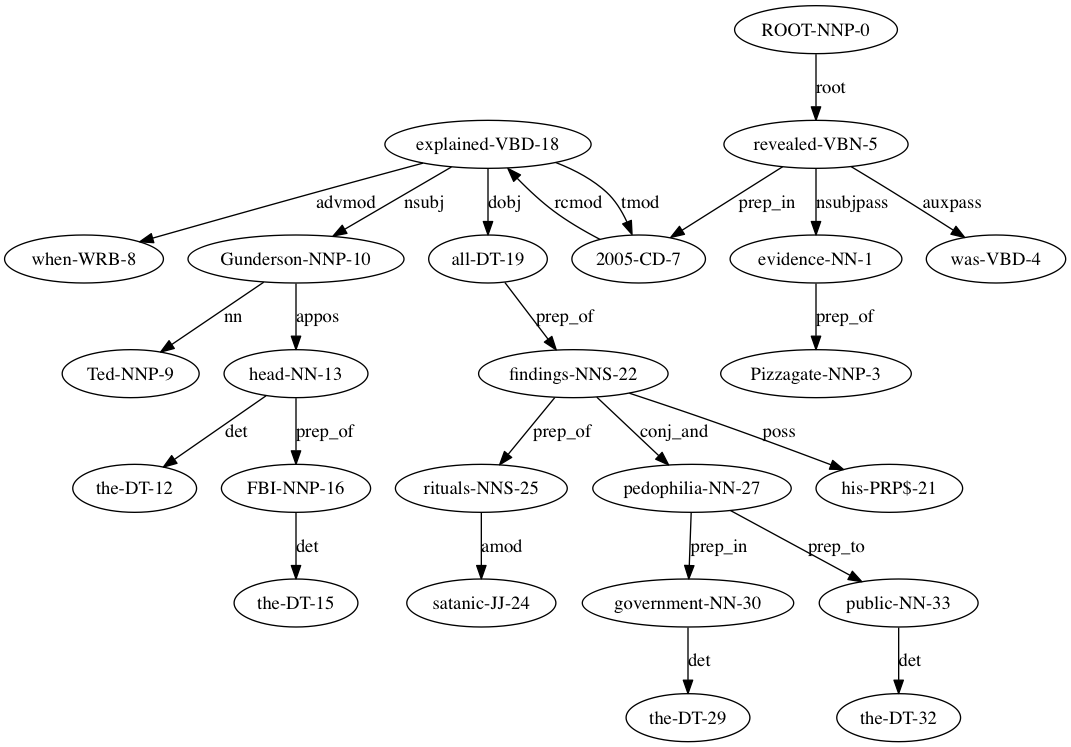

In [70]:
new_sent = srl_test["arg1"] + " " + srl_test["rel"] + " "+ srl_test["arg2"]
new_sent = new_sent.replace("{","").replace("}","")

t_annotated = annotator.getAnnotations(t, dep_parse=True)

dep = t_annotated['dep_parse']
g_dir = create_dep_graph(t_annotated)

if g_dir is None:
    print "No extraction found"
#if SHOW_DP_PLOTS:
plot_dep(g_dir,t)
g_undir = g_dir.to_undirected()

#rels_pure, rels_simp = get_relations(g_dir, t_annotated,EXTRACT_NESTED_PREPOSITIONS_RELS=True, option="SVO")
arg1 = new_sent["arg1"].replace("{","").replace("}","")

#for w in arg1:
    


In [49]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
#word = "wakeup" #->(True, True)
#word = "co-founded" #->not a word (False,False)
#word = "mashup" #-> not a word
word = "kidfriendly" #-> not a word


In [23]:
import enchant

d = enchant.Dict("en_US")
d.check(word)

False

In [24]:
from nltk.corpus import wordnet
if not wordnet.synsets(word):
    print("not an english")
else:
    print("English word")

not an english
